In [4]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np

In [5]:
import tensorflow
tensorflow.__version__

'2.6.0'

In [6]:
encoding_dim = 1000
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='relu')(encoded)
autoencoder = Model(input_img, decoded)

In [7]:
encoder = Model(input_img, encoded)

In [8]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [11]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [15]:
autoencoder.fit(x_train, x_train,
                epochs=5000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Se han truncado las últimas 5000 líneas del flujo de salida.
235/235 [==============================] - 1s 5ms/step - loss: 0.1167 - val_loss: 0.1151
Epoch 2502/5000
235/235 [==============================] - 1s 5ms/step - loss: 0.1167 - val_loss: 0.1151
Epoch 2503/5000
235/235 [==============================] - 1s 5ms/step - loss: 0.1167 - val_loss: 0.1151
Epoch 2504/5000
235/235 [==============================] - 1s 5ms/step - loss: 0.1167 - val_loss: 0.1151
Epoch 2505/5000
235/235 [==============================] - 1s 5ms/step - loss: 0.1166 - val_loss: 0.1151
Epoch 2506/5000
235/235 [==============================] - 1s 5ms/step - loss: 0.1166 - val_loss: 0.1151
Epoch 2507/5000
235/235 [==============================] - 1s 5ms/step - loss: 0.1166 - val_loss: 0.1151
Epoch 2508/5000
235/235 [==============================] - 1s 5ms/step - loss: 0.1166 - val_loss: 0.1150
Epoch 2509/5000
235/235 [==============================] - 1s 5ms/step - loss: 0.1166 - val_loss: 0.1150
Epoch 2510

In [16]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

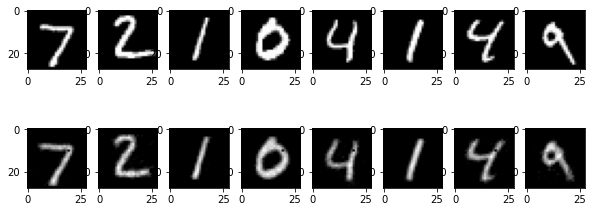

In [17]:
n = 8  
plt.figure(figsize=(10, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
plt.show()